The red color in wine comes from a pigment called anthocyanin. 
Flavonoids include the anthocyanins and tannins which contribute to the color and mouthfeel of the wine.
Many people believe that red wine comes from red grapes and white wine comes from white grapes,
While this is usually the case, it is for a different reason than most would assume.

The juice from almost all grapes is actually clear!  
So if grape juice is clear, then what makes red wine, red? 
Most of the color in wine actually comes from skin contact during fermentation (also known as maceration). 
The skins of the grapes contain most of the pigment and during fermentation, a lot of this color is imparted into the wine.  
This is also where much of the tannin in wine comes from as well as the antioxidants and polyphenols that make red wine healthy come from.
Wines with more red colored hue have a lower pH (high acidity).
Wines with a violet colored hue range from around 3.4–3.6 pH (on average).
Wines with a more blueish tint (almost like magenta) are over 3.6 pH and possibly closer to 4 (low acidity).
Of course, each red grape variety expresses color a little bit differently and there are many variables that will affect the color (variables such as co-pigmentation, sulfur additions, etc.), but the above is generally true!

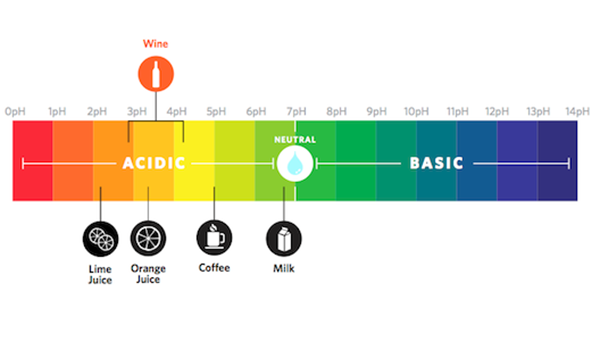

In [1]:
from IPython.display import Image
Image(filename='Wine_pH_scale.png')

# This is how the Flavonoid Molecules look like :)

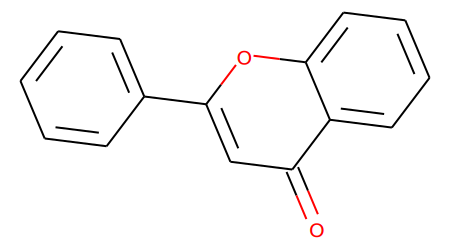

In [2]:
from IPython.display import SVG
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
# Create mol object from smiles string
mol = Chem.MolFromSmiles('C1=CC=C(C=C1)C2=CC(=O)C3=CC=CC=C3O2')
molSize=(450,250)

mc = Chem.Mol(mol.ToBinary())
if not mc.GetNumConformers():
#....#Compute 2D coordinates
    rdDepictor.Compute2DCoords(mc)
# init the drawer with the size
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
#draw the molcule
drawer.DrawMolecule(mc)
drawer.FinishDrawing()
# get the SVG string
svg = drawer.GetDrawingText()
# fix the svg string and display it
display(SVG(svg.replace('svg:','')))

In [3]:
import re
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import math
from time import gmtime, strftime
%matplotlib inline

In [4]:
#Plots Setting
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=10)   # fontsize of the figure title
plt.rc('lines', linewidth=1, color='r')
plt.rcParams['figure.figsize']=(8,6)
Set1=['Saffron', 'Green','Yellow','pink', 'Navy','purple','black','Blue']

In [5]:
wine=pd.read_csv('wine.csv')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.columns.unique()

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
wine.isna().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [9]:
wine.Class.unique()

array([1, 2, 3], dtype=int64)

In [10]:
len(wine[wine.Class==1])

59

In [11]:
wine.Hue.describe()

count    178.000000
mean       0.957449
std        0.228572
min        0.480000
25%        0.782500
50%        0.965000
75%        1.120000
max        1.710000
Name: Hue, dtype: float64

C:\Users\behodi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


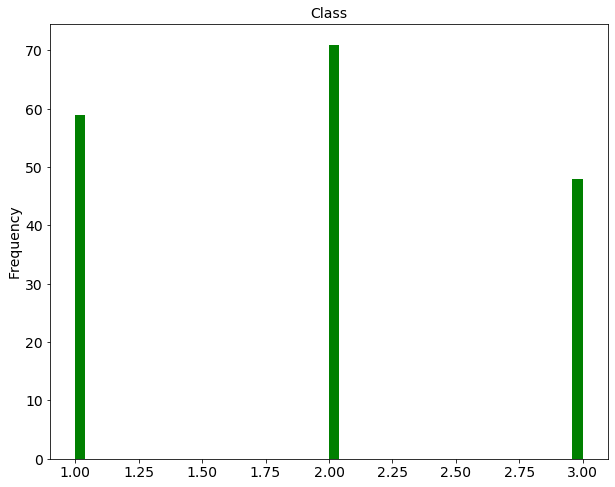

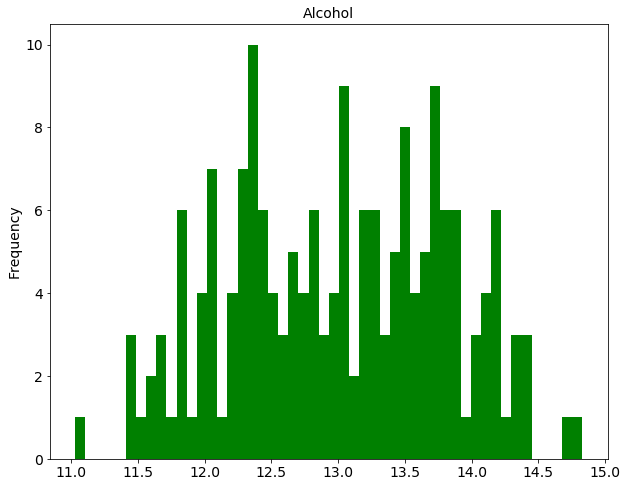

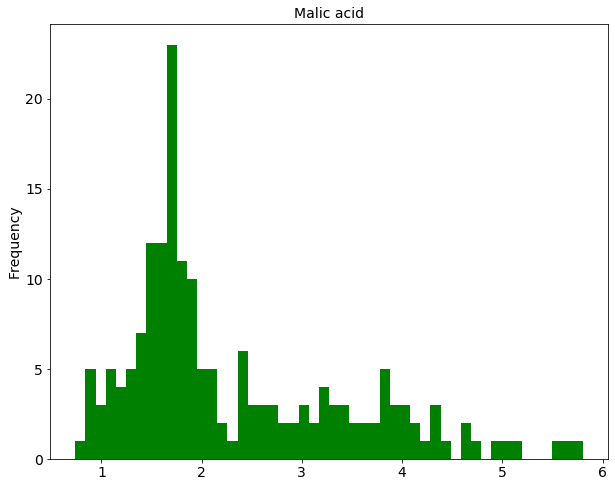

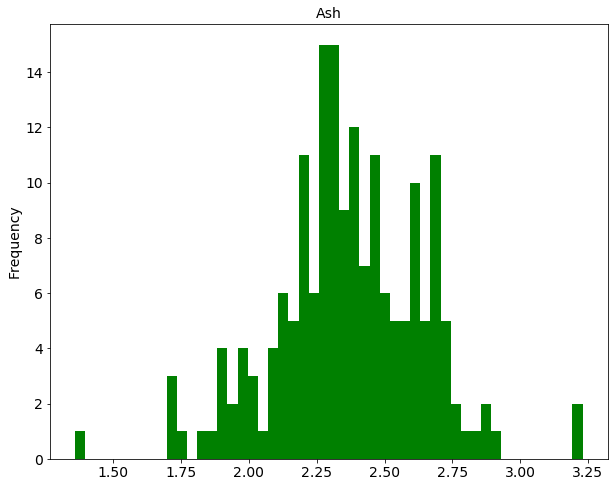

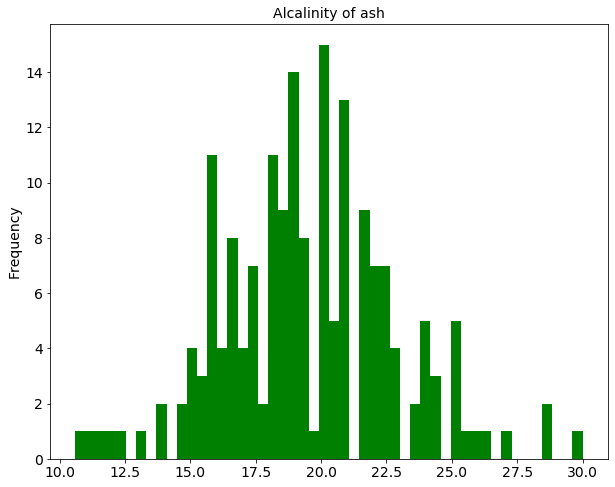

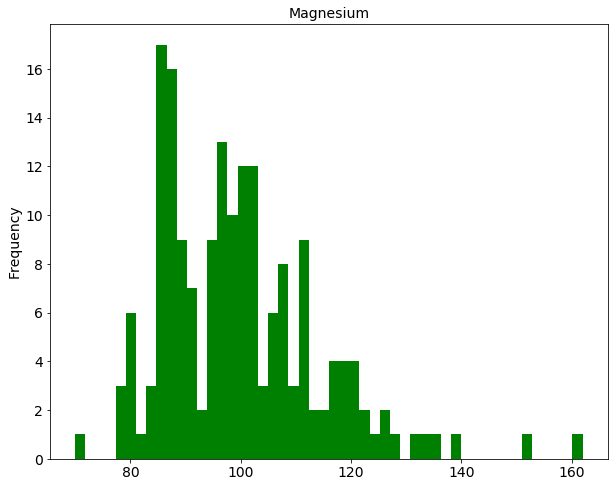

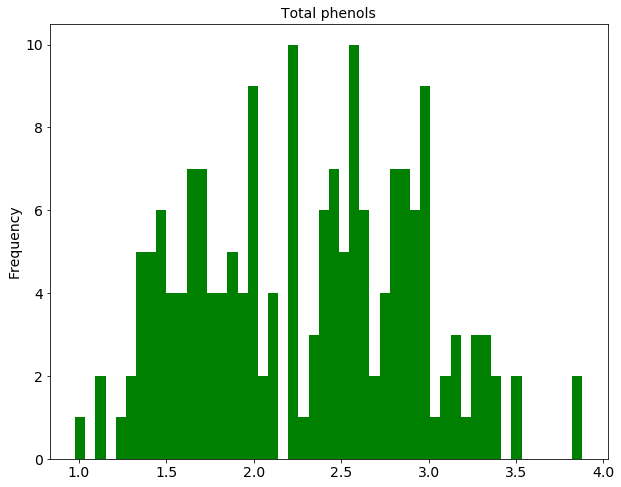

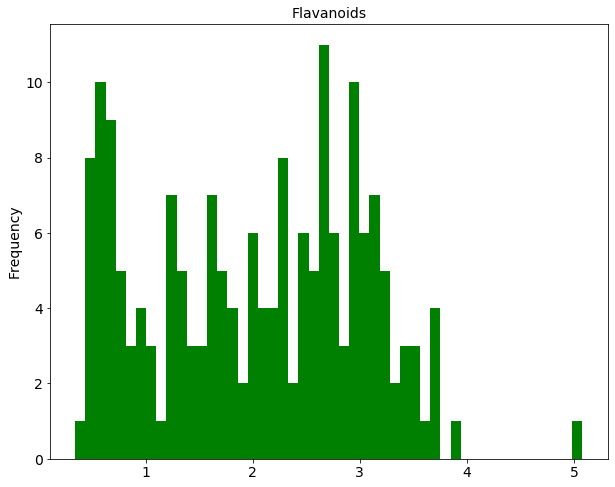

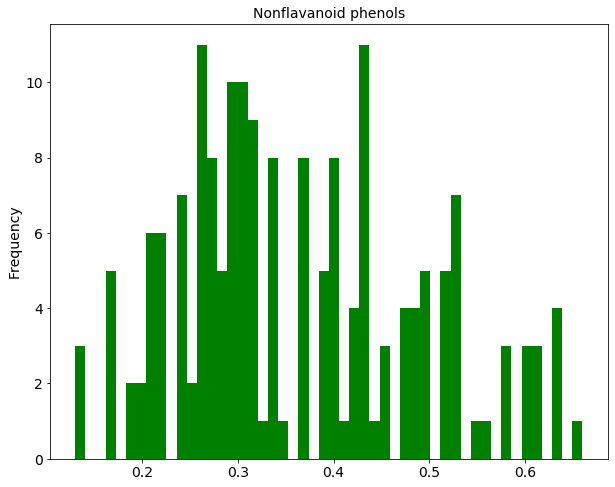

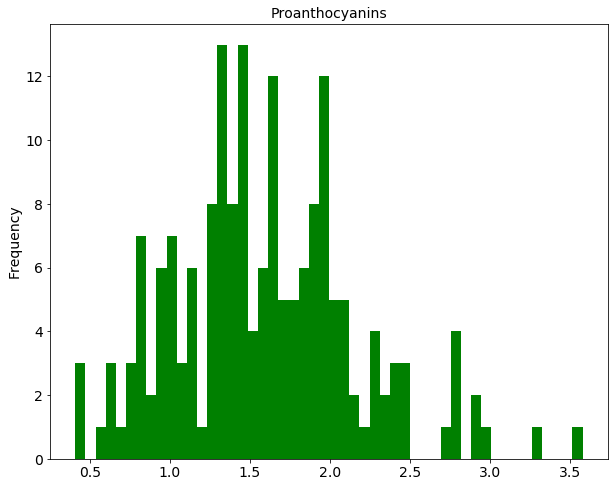

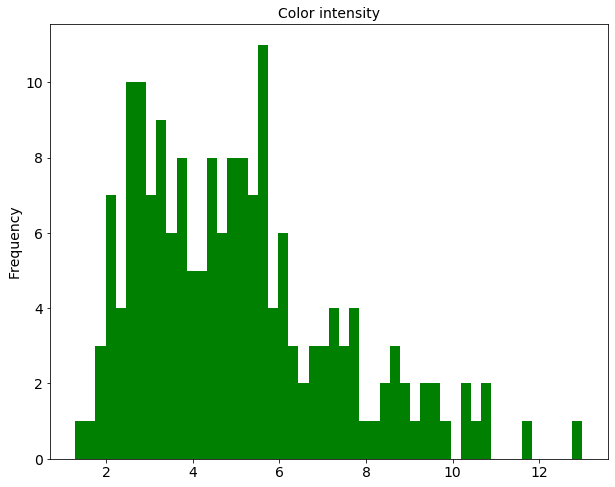

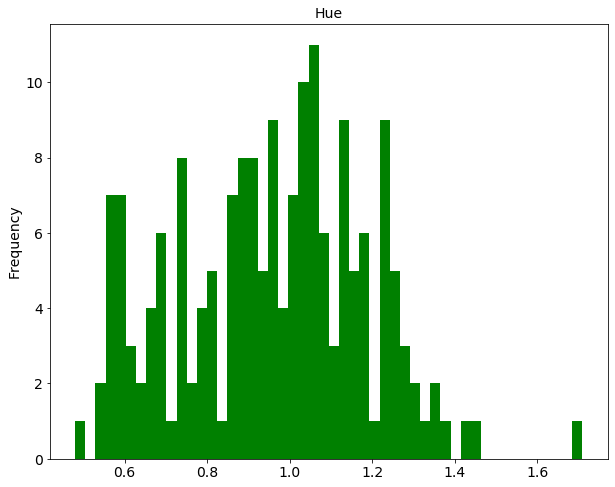

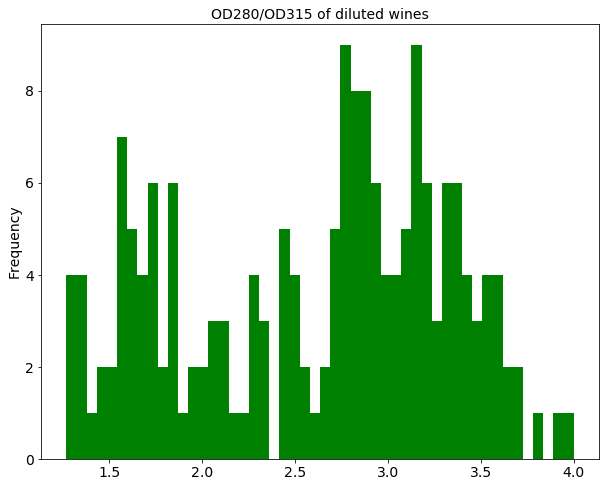

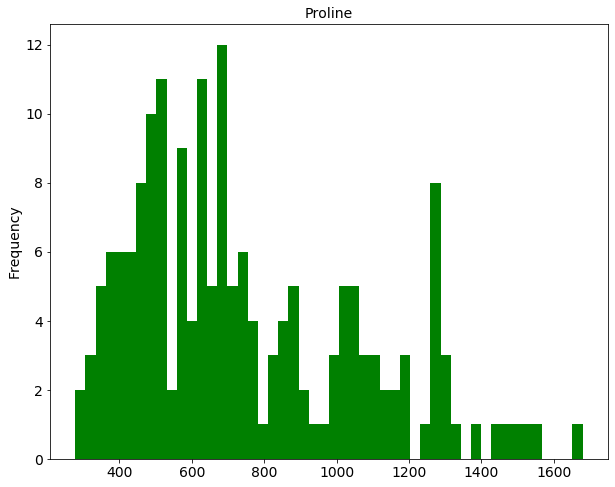

In [12]:
histo=list(wine.columns)
for i in range(len(histo)):
    fig=wine.iloc[:,i].plot('hist', color='green', bins=50, figsize=(10,8))
    plt.title(wine.columns[i])
    plt.show()

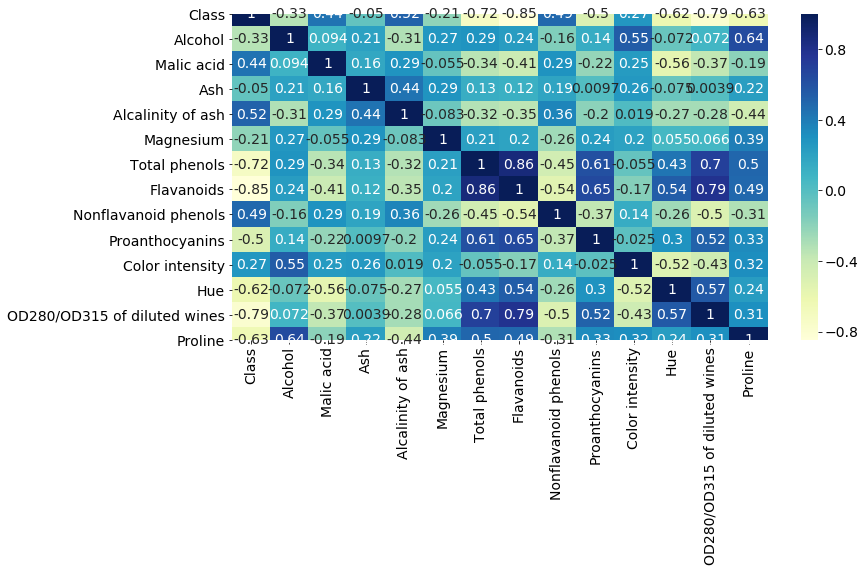

In [13]:
#correlational heat map
wine_corr=wine.iloc[:,:].corr();
plt.figure(figsize=(12,6))
sns.heatmap(wine_corr, cmap='YlGnBu', annot=True)

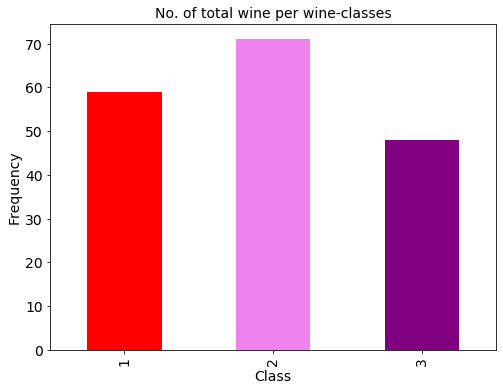

In [14]:
#wine classes
count_classes = pd.value_counts(wine['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['Red','violet', 'purple'])
plt.title("No. of total wine per wine-classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [15]:
wine[wine.Class==1]['Magnesium'].describe()

count     59.000000
mean     106.338983
std       10.498949
min       89.000000
25%       98.000000
50%      104.000000
75%      114.000000
max      132.000000
Name: Magnesium, dtype: float64

In [16]:
wine[wine.Class==1]['Color intensity'].describe()

count    59.000000
mean      5.528305
std       1.238573
min       3.520000
25%       4.550000
50%       5.400000
75%       6.225000
max       8.900000
Name: Color intensity, dtype: float64

In [17]:
wine['Color intensity'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: Color intensity, dtype: float64

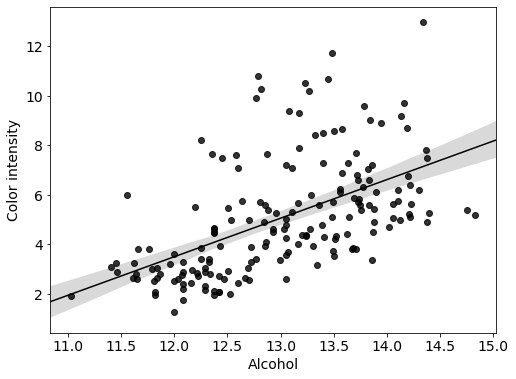

In [18]:
sns.regplot(x='Alcohol', y='Color intensity', color='black', data=wine)

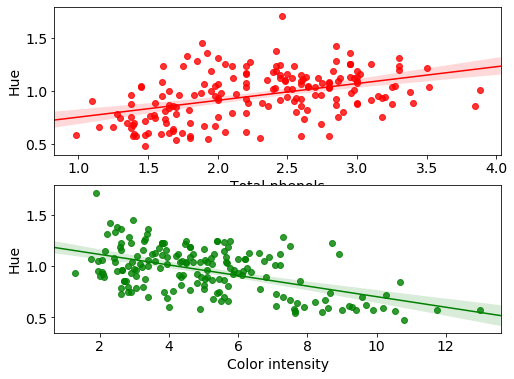

In [19]:
fig, axes = plt.subplots(2, 1)
sns.regplot(x='Total phenols',y='Hue', color='red', data=wine, ax=axes[0])
sns.regplot(x='Color intensity',y='Hue', color='green', data=wine, ax=axes[1])

In [20]:
sns.regplot(x='Flavanoids',y='Hue', color='red', data=wine, ax=axes[0])

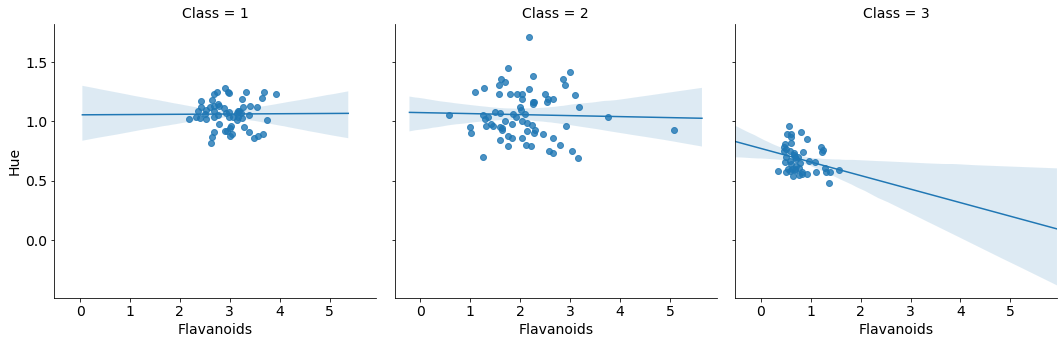

In [21]:
sns.lmplot(x='Flavanoids',y='Hue', col='Class', data=wine, aspect=1)

In [22]:
imp =wine.corr().iloc[0:(len(wine.columns)-1),-1].abs().sort_values(ascending=False)
limp = list(imp.index[0:14].values)

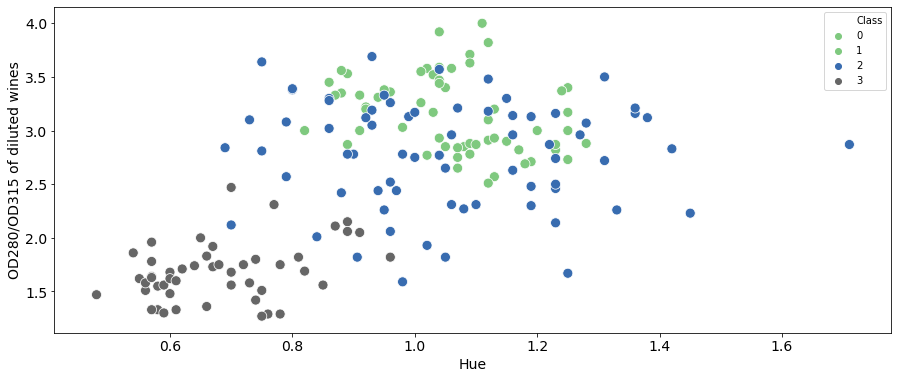

In [23]:
plt.figure(figsize=(15,6))
fig = sns.scatterplot(x=limp[10], y=limp[8], hue='Class', data=wine, palette='Accent', s=100)
plt.show()

In [24]:
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


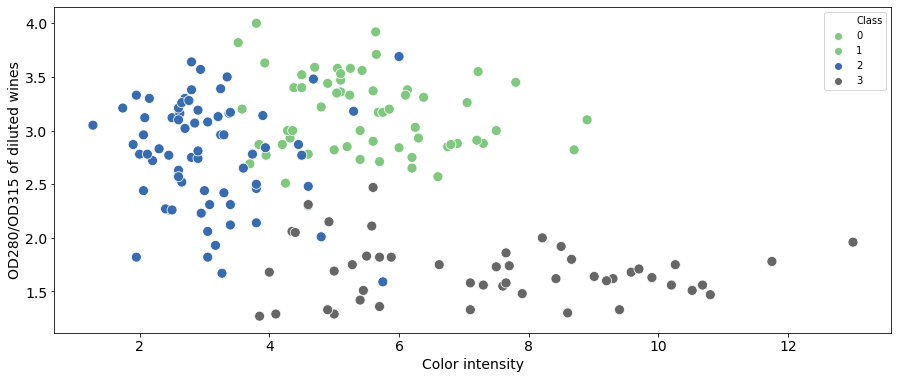

In [25]:
plt.figure(figsize=(15,6))
fig = sns.scatterplot(x=limp[7], y=limp[8], hue='Class', data=wine, palette='Accent', s=100)
plt.show()

In [26]:
#https://en.wikipedia.org/wiki/Phenol
#https://www.academia.edu/34116227/Classification_of_three_wines_from_physical_and_chemical_attributes
#http://www.wineeducation.com/wineismadeof.html